ESRA BARDAKCI
Student Id:702201004

In [54]:
def problem1(filename):
    import pandas as pd
    import numpy as np
    from sklearn.linear_model import Ridge
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.model_selection import cross_validate as cv
    from sklearn.model_selection import train_test_split
    from sklearn import linear_model
    from sklearn.linear_model import RidgeCV
    from sklearn.preprocessing import StandardScaler
    data=pd.read_excel(filename)  
    X, y1,y2 = data.iloc[:, :-2], data['Y1'], data['Y2']
    
    #task1 
    #y1
    print('problem-1 Task-1')
    r_reg_cv = RidgeCV(alphas=[0.001,0.01,0.1,1,10]) #RidgeCV optimal parameter search for alpha parameter set
    y1_cv = r_reg_cv.fit(X, y1) #fitting on data 
    y1_alpha=y1_cv.alpha_   #optimal parameter
    print('Optimal alpha parameter of Ridge model for target y1: ',y1_alpha)
    model_ridge_y1=Ridge(alpha=y1_alpha) #object creation
    from sklearn.model_selection import RepeatedKFold
    rkf=RepeatedKFold(n_splits=10,n_repeats=10,random_state=True) #cv definition
    from sklearn.model_selection import cross_val_score
    mae_y1=-cross_val_score(model_ridge_y1,X,y1,cv=rkf,scoring="neg_mean_absolute_error") #cross-validation with 'mean absolute error' scoring
    mse_y1=-cross_val_score(model_ridge_y1,X,y1,cv=rkf,scoring="neg_mean_squared_error") #cross-validation with 'mean squared error' scoring

    print('Ridge mean score of mae value for Y1 is: ',mae_y1.mean())
    print('Ridge standard deviation of mae value for Y1 is: ',mae_y1.std() )
    print('Ridge mean score of mse value for Y1 is: ',mse_y1.mean())
    print('Ridge standard deviation of mse value for Y1 is: ',mse_y1.std())
    #task1
    #y2
    y2_cv = r_reg_cv.fit(X, y2) #fitting ridgecv on data with y2 target
    y2_alpha=y2_cv.alpha_   #optimal parameter
    print('\nOptimal alpha parameter of Ridge model for target y2 is: ',y2_alpha)
    model_ridge_y2=Ridge(alpha=y2_alpha) #model creation 
    mae_y2=-cross_val_score(model_ridge_y2,X,y2,cv=rkf,scoring="neg_mean_absolute_error") #cross-validation with 'mean absolute error' scoring
    mse_y2=-cross_val_score(model_ridge_y2,X,y2,cv=rkf,scoring="neg_mean_squared_error") #cross-validation with 'mean squared error' scoring
    print('Ridge mean score of mae value for Y2 is: ',mae_y2.mean())
    print('Ridge standard deviation of mae value for Y2 is: ',mae_y2.std() )
    print('Ridge mean score of mse value for Y2 is: ',mse_y2.mean())
    print('Ridge standard deviation of mse value for Y2 is: ',mse_y2.std() )
    
    "------------------------------------------------------------------"
    print('\n\nProblem-1 Task-2')
    #task2
    #y1
    from sklearn.model_selection import GridSearchCV
    #Creation of parameter grid 
    parameter_grid = {
    'n_estimators': (10,50,100,250,500),
    'max_depth': (50,150,250),
    'min_samples_split': (2,3),
    'min_samples_leaf': (1,2,3)
    }
    rfr = RandomForestRegressor() #Random Forest model creation
    grid_search = GridSearchCV(estimator = rfr, param_grid = parameter_grid,cv = 3, n_jobs = -1, verbose = 0) #grid search model
    X_train, X_test, y1_train, y1_test = train_test_split(X, y1) #splitting data
    grid_search.fit(X_train, y1_train) #fitting grid model on data
    print('Best parameters set for target y1:')
    print(grid_search.best_params_)
    #assigning parameters to variables
    max_depth_y1=grid_search.best_params_['max_depth']
    min_samples_leaf_y1=grid_search.best_params_['min_samples_leaf']
    min_samples_split_y1=grid_search.best_params_['min_samples_split']
    n_estimators_y1=grid_search.best_params_['n_estimators']
    clf_y1=RandomForestRegressor(n_estimators=n_estimators_y1,min_samples_leaf=min_samples_leaf_y1,min_samples_split=min_samples_split_y1,max_depth=max_depth_y1) #creating object with best parameters
    from sklearn.model_selection import RepeatedKFold
    from sklearn.model_selection import cross_val_score
    rkf=RepeatedKFold(n_splits=10,n_repeats=10,random_state=True)
    #calculating cross validation using mean absolute/squared error scoring functions
    mae_y1_forest=-cross_val_score(clf_y1,X,y1,cv=rkf,scoring="neg_mean_absolute_error") 
    mse_y1_forest=-cross_val_score(clf_y1,X,y1,cv=rkf,scoring="neg_mean_squared_error")
    print('Forest mean score of mae value for Y1 is: ',mae_y1_forest.mean())
    print('Forest standard deviation of mae value for Y1 is: ',mae_y1_forest.std() )
    print('Forest mean score of mse value for Y1 is: ',mse_y1_forest.mean())
    print('Forest standard deviation of mse value for Y1 is: ',mse_y1_forest.std() )
    
    #task2 
    #y2
    X_train, X_test, y2_train, y2_test = train_test_split(X, y2) #splitting data picking target as y2
    grid_search = GridSearchCV(estimator = rfr, param_grid = parameter_grid,cv = 3, n_jobs = -1, verbose = 0) 
    grid_search.fit(X_train, y2_train) #fitting grid search on the data
    print('\nBest parameters set for target y2:')
    print(grid_search.best_params_)
    #assigning best parameters to variables
    max_depth_y2=grid_search.best_params_['max_depth']
    min_samples_leaf_y2=grid_search.best_params_['min_samples_leaf']
    min_samples_split_y2=grid_search.best_params_['min_samples_split']
    n_estimators_y2=grid_search.best_params_['n_estimators']
    clf_y2=RandomForestRegressor(n_estimators=n_estimators_y2,min_samples_leaf=min_samples_leaf_y2,min_samples_split=min_samples_split_y2,max_depth=max_depth_y2) #creating object with best parameters
    #calculating cross validation using mean absolute/squared error scoring functions
    mae_y2_forest=-cross_val_score(clf_y2,X,y2,cv=rkf,scoring="neg_mean_absolute_error")
    mse_y2_forest=-cross_val_score(clf_y2,X,y2,cv=rkf,scoring="neg_mean_squared_error")  
    print('Forest mean score of mae value for Y2 is: ',mae_y2_forest.mean())
    print('Forest standard deviation of mae value for Y2 is: ',mae_y2_forest.std())
    print('Forest mean score of mse value for Y2 is: ',mse_y2_forest.mean())
    print('Forest standard deviation of mse value for Y2 is: ',mse_y2_forest.std() )
    
    
    

In [55]:
problem1("homework1-data/ENB2012_data.xlsx")

problem-1 Task-1
Optimal alpha parameter of Ridge model for target y1:  0.001
Ridge mean score of mae value for Y1 is:  2.0910518036913537
Ridge standard deviation of mae value for Y1 is:  0.2361482238285338
Ridge mean score of mse value for Y1 is:  8.710823249413732
Ridge standard deviation of mse value for Y1 is:  1.7413434482072414

Optimal alpha parameter of Ridge model for target y2 is:  0.001
Ridge mean score of mae value for Y2 is:  2.2667374490882337
Ridge standard deviation of mae value for Y2 is:  0.26950209601233466
Ridge mean score of mse value for Y2 is:  10.353927888203657
Ridge standard deviation of mse value for Y2 is:  2.531010179953866


Problem-1 Task-2
Best parameters set for target y1:
{'max_depth': 250, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Forest mean score of mae value for Y1 is:  0.31243733096377324
Forest standard deviation of mae value for Y1 is:  0.03968503541248176
Forest mean score of mse value for Y1 is:  0.21742151000691998
F

In [23]:
def problem2_task1(filename):
    import pandas as pd
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import GridSearchCV
    import numpy as np
    from sklearn.metrics import roc_auc_score
    from sklearn.model_selection import cross_validate as cv
    from sklearn.model_selection import RepeatedKFold
    from sklearn.preprocessing import StandardScaler
    data=pd.read_csv(filename,sep=';')
    data_update=pd.get_dummies(data,columns=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y'],drop_first=True)
    X,y= data_update.iloc[:, :-1], data_update['y_yes']   
    scaler = StandardScaler()
    X_std = scaler.fit_transform(X) #data scaling
    cparam_space=np.logspace(-4,4,20)
    parameter_grid={'C':cparam_space}
    logreg=LogisticRegression(solver='lbfgs', max_iter=10000) #model creation
    rkf=RepeatedKFold(n_splits=5, n_repeats=5,random_state=True) #5 fold,5 repetition
    logreg_grid= GridSearchCV(estimator=logreg,param_grid=parameter_grid,cv=rkf,scoring='roc_auc') #grid search model creation
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X_std, y,test_size=0.02) #splitting data
    logreg_grid.fit(X_train, y_train) #fitting training data
    d=pd.DataFrame(logreg_grid.cv_results_) #exporting results for plotting
    print('best C parameter is',logreg_grid.best_params_,'with',logreg_grid.best_score_,'AUG score')
    d=d[['param_C','mean_test_score']]
    import matplotlib.pyplot as plt
    C=d['param_C'].tolist()
    AUC=d['mean_test_score'].tolist()
    from matplotlib.ticker import ScalarFormatter
    plt.plot(C,AUC,'mo-')
    plt.xscale('log')
    plt.yticks(np.arange(min(AUC), max(AUC)+0.005, 0.005 ))
    plt.title("Logistic Regression Model")
    plt.xlabel("C parameter")
    plt.ylabel("Mean AUC score")
    plt.grid()
    plt.show()







best C parameter is {'C': 1.623776739188721} with 0.9351636957716422 AUG score


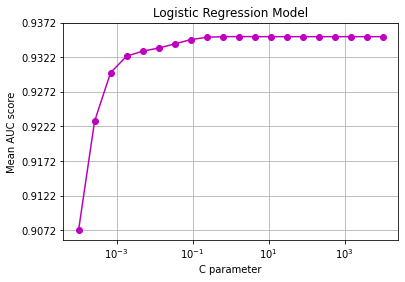

In [25]:
problem2_task1('homework1-data/bank-additional-full.csv')

In [48]:
def problem2_task2(filename):
    import pandas as pd
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import GridSearchCV
    import numpy as np
    from sklearn.metrics import roc_auc_score
    from sklearn.model_selection import cross_validate as cv
    from sklearn.model_selection import RepeatedKFold
    from sklearn.preprocessing import StandardScaler
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import GridSearchCV
    
    data=pd.read_csv(filename,sep=';')
    data_update=pd.get_dummies(data,columns=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y'],drop_first=True)   
    X,y= data_update.iloc[:, :-1], data_update['y_yes']
    scaler = StandardScaler() 
    X_std = scaler.fit_transform(X) #data scaling
    #parameter grid creation for grid search
    parameter_grid = {
    'n_estimators': (10,50,100,250,500,1000),
    'max_depth': (50,150,250),
    'min_samples_split': (2,3),
    'min_samples_leaf': (1,2,3)
    }
    rfr = RandomForestRegressor() #Random Forest object creation
    rkf=RepeatedKFold(n_splits=3, n_repeats=3,random_state=True) #3-fold, 3 repetition 
    #grid search model 
    forest_grid = GridSearchCV(estimator = rfr, param_grid = parameter_grid,cv = rkf, n_jobs = -1, verbose = 0,scoring='roc_auc')
    X_train, X_test, y_train, y_test = train_test_split(X_std, y)  #splitting data
    forest_grid.fit(X_train, y_train) #fitting the grid model on training data
    
    print('Best parameter set with ', forest_grid.best_score_,'AUC score is: ')
    print(forest_grid.best_params_)
    

In [49]:
problem2_task2('homework1-data/bank-additional-full.csv')

Best parameter set with  0.9448275462821978 AUC score is: 
{'max_depth': 150, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 1000}


In [28]:
def problem2_task3(filename):
    import pandas as pd
    from sklearn.model_selection import GridSearchCV
    import numpy as np
    from sklearn.metrics import roc_auc_score
    from sklearn.model_selection import cross_validate as cv
    from sklearn.model_selection import RepeatedKFold
    from sklearn.preprocessing import StandardScaler
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.model_selection import train_test_split
    from sklearn.neural_network import MLPClassifier
    
    data=pd.read_csv(filename,sep=';')
    data_update=pd.get_dummies(data,columns=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y'],drop_first=True)   
    X,y= data_update.iloc[:, :-1], data_update['y_yes']
    scaler = StandardScaler()
    X_std = scaler.fit_transform(X) #data scaling
    
    mlp=MLPClassifier(max_iter=1000) #model object creation 
    #parameter grid
    param_grid = {
        'hidden_layer_sizes': ((10,10,10),(10,10,10,10),(10,10,10,10,10),(10,10,10,10,10,10)),
    'alpha': (0.00001, 0.0001, 0.001, 0.01, 0.1)
    }
    
    rkf=RepeatedKFold(n_splits=3, n_repeats=3,random_state=True) #3-fold 3-repetition
    #grid search model creation
    mlp_grid = GridSearchCV(estimator = mlp, param_grid = param_grid,cv = rkf, n_jobs = -1, verbose = 0,scoring='roc_auc')
    X_train, X_test, y_train, y_test = train_test_split(X_std, y) #splitting data
    mlp_grid.fit(X_train, y_train) #fitting grid search on data
    
    print('Best parameter set with :', mlp_grid.best_score_,'AUC score is: ')
    print(mlp_grid.best_params_)
    

In [29]:
problem2_task3('homework1-data/bank-additional-full.csv')

Best parameter set with : 0.9361001322834065 AUC score is: 
{'alpha': 0.1, 'hidden_layer_sizes': (10, 10, 10)}


In [52]:
def problem2_task4(filename):
    import pandas as pd
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import GridSearchCV
    import numpy as np
    from sklearn.metrics import roc_auc_score
    from sklearn.model_selection import cross_validate as cv
    from sklearn.model_selection import RepeatedKFold
    from sklearn.preprocessing import StandardScaler
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.model_selection import train_test_split
    from sklearn.neural_network import MLPClassifier
    from sklearn.metrics import classification_report, accuracy_score, make_scorer
    from sklearn.model_selection import cross_val_score
    from sklearn.ensemble import RandomForestClassifier
    
    data=pd.read_csv(filename,sep=';')
    data_update=pd.get_dummies(data,columns=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y'],drop_first=True)   
    X,y= data_update.iloc[:, :-1], data_update['y_yes']
    scaler = StandardScaler() 
    X_std = scaler.fit_transform(X) #data scaling
    X_train, X_test, y_train, y_test = train_test_split(X_std, y,test_size=0.2)
    "--------------for Logistic Regression----------------------"
    trueclassLR = []
    predclassLR = []
    logreg=LogisticRegression(C=1, max_iter=10000)
    rkf=RepeatedKFold(n_splits=5,random_state=True)
     #creating a function to fill empty lists of each model
    def classification_report_with_accuracy_score(y_train, y_test):
        trueclassLR.extend(y_train)
        predclassLR.extend(y_test)
        return accuracy_score(y_train, y_test)
    #cross validation
    classification_report_LR = cross_val_score(logreg, X_std, y, cv=rkf,scoring=make_scorer(classification_report_with_accuracy_score))
    print("Classification report for Logistic Regression:") #average scores for 5-Fold cross-validation
    print(classification_report(trueclassLR, predclassLR))  #classification table  
    "--------------for Neural Network----------------------"
    trueclassNN = []
    predclassNN = []
    clf=MLPClassifier(max_iter=1000,alpha=0.1, hidden_layer_sizes=(10, 10, 10)) #best parameters
    def classification_report_with_accuracy_score(y_train, y_test): 
        trueclassNN.extend(y_train)
        predclassNN.extend(y_test)
        return accuracy_score(y_train, y_test)  
    
    classification_report_NN = cross_val_score(clf, X_std, y, cv=rkf,scoring=make_scorer(classification_report_with_accuracy_score))
    print("Classification report for Neural Network")
    print(classification_report(trueclassNN, predclassNN)) 
    
    "---------------for Random Forest-------------------"

    trueclassRF = []
    predclassRF = []
    rfc = RandomForestClassifier(max_depth=150,min_samples_leaf=3,min_samples_split=3,n_estimators=1000)
    def classification_report_with_accuracy_score(y_train, y_test):
        trueclassRF.extend(y_train)
        predclassRF.extend(y_test)
        return accuracy_score(y_train, y_test) 

    classification_report_RF = cross_val_score(rfc, X_std, y, cv=rkf,scoring=make_scorer(classification_report_with_accuracy_score))
    print("Classification report for Random Forest")
    print(classification_report(trueclassRF, predclassRF)) 



In [53]:
problem2_task4('homework1-data/bank-additional-full.csv')

Classification report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95    365480
           1       0.66      0.42      0.52     46400

    accuracy                           0.91    411880
   macro avg       0.80      0.70      0.73    411880
weighted avg       0.90      0.91      0.90    411880

Classification report for Neural Network
              precision    recall  f1-score   support

           0       0.95      0.96      0.95    365480
           1       0.62      0.56      0.59     46400

    accuracy                           0.91    411880
   macro avg       0.78      0.76      0.77    411880
weighted avg       0.91      0.91      0.91    411880

Classification report for Random Forest
              precision    recall  f1-score   support

           0       0.93      0.97      0.95    365480
           1       0.68      0.46      0.55     46400

    accuracy                           0.91    411880
